This example shows how to obtain the volume velocity transfer function of the
vocal tract based on vocal tract parameters for a certain phone in the speaker
file.

Look into example1.py for more thorough comments on how to interface
vocaltractlab API from python3.

In [1]:
import ctypes
import sys
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
VTL = ctypes.cdll.LoadLibrary('vtlapi-2.1b/VocalTractLabApi64.so')

In [3]:
version = ctypes.c_char_p(b'                                ')
VTL.vtlGetVersion(version)
print('Compile date of the library: "%s"' % version.value.decode())

Compile date of the library: "Mar 16 2016"


## Initialize vtl

In [5]:
speaker_file_name = ctypes.c_char_p('vtlapi-2.1b/JD2.speaker'.encode())

failure = VTL.vtlInitialize(speaker_file_name)
if failure != 0:
    raise ValueError('Error in vtlInitialize! Errorcode: %i' % failure)

## Get some constants

In [6]:
audio_sampling_rate = ctypes.c_int(0)
number_tube_sections = ctypes.c_int(0)
number_vocal_tract_parameters = ctypes.c_int(0)
number_glottis_parameters = ctypes.c_int(0)

VTL.vtlGetConstants(ctypes.byref(audio_sampling_rate),
                    ctypes.byref(number_tube_sections),
                    ctypes.byref(number_vocal_tract_parameters),
                    ctypes.byref(number_glottis_parameters))

print('Audio sampling rate = %i' % audio_sampling_rate.value)
print('Num. of tube sections = %i' % number_tube_sections.value)
print('Num. of vocal tract parameters = %i' % number_vocal_tract_parameters.value)
print('Num. of glottis parameters = %i' % number_glottis_parameters.value)

Audio sampling rate = 22050
Num. of tube sections = 40
Num. of vocal tract parameters = 24
Num. of glottis parameters = 6


## Get the vocal tract parameters 
- for the phone /a/, which are saved in the speaker file.

In [7]:
TRACT_PARAM_TYPE = ctypes.c_double * number_vocal_tract_parameters.value
shape_name = ctypes.c_char_p(b'a')
params_a = TRACT_PARAM_TYPE()

failure = VTL.vtlGetTractParams(shape_name, ctypes.byref(params_a))
if failure != 0:
    raise ValueError('Error in vtlGetTractParams! Errorcode: %i' % failure)

## Extract transfer function

In [8]:
NUM_SPECTRUM_SAMPLES = 1024
SPECTRUM_TYPE = ctypes.c_double * NUM_SPECTRUM_SAMPLES
magnitude_spectrum = SPECTRUM_TYPE()
phase_spectrum = SPECTRUM_TYPE()  # in radiants

VTL.vtlGetTransferFunction(ctypes.byref(params_a),  # input
                           NUM_SPECTRUM_SAMPLES,  # input
                           ctypes.byref(magnitude_spectrum),  # output
                           ctypes.byref(phase_spectrum))  # output

print('First 40 data points for every vector:')
print('  magnitude_spectrum: %s' % str(list(magnitude_spectrum)[:40]))
print('  phase_spectrum: %s' % str(list(phase_spectrum)[:40]))

First 40 data points for every vector:
  magnitude_spectrum: [1.0171797623900083, 1.0171797623900083, 0.95365474550429, 0.9080445076477925, 0.8913119592706285, 0.8901587591643161, 0.8983363629146688, 0.9133191383092006, 0.9341764860828572, 0.9607594862630039, 0.9934188266885063, 1.0329609762341379, 1.0806573833446815, 1.1369547397193078, 1.193878918884664, 1.2522865741878337, 1.3309361532576347, 1.4293251583914115, 1.5481272302496636, 1.6917052768085123, 1.867111256073041, 2.0847309088780532, 2.360092269288461, 2.7173427723169357, 3.196090438244724, 3.865988540588798, 4.861529646594278, 6.479003808060988, 9.515608465574251, 16.96588309332864, 43.90117155336024, 25.685711504298926, 13.166813171713786, 8.930501023304965, 6.890010319960402, 5.716083706856928, 4.971541384938479, 4.474883781878095, 4.137819569306742, 3.912013723845171]
  phase_spectrum: [-0.06782420528272795, -0.06782420528272795, -0.12815598877679324, -0.12491684616360982, -0.11004422054140489, -0.09661511982506639, -0.086

## Destroy current state of VTL and free memory

In [9]:
VTL.vtlClose()

0

## Plot and play transfer function


Close the plot in order to continue.


/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


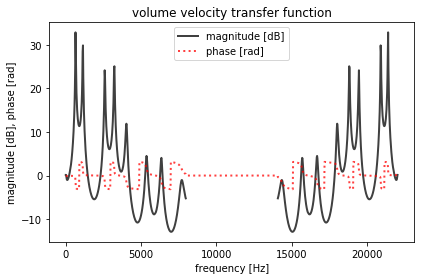

In [16]:
frequency = np.arange(NUM_SPECTRUM_SAMPLES)
frequency = np.multiply(frequency,audio_sampling_rate.value/ NUM_SPECTRUM_SAMPLES,out=frequency,casting='unsafe')
plt.plot(frequency, 20 * np.log10(magnitude_spectrum), c='black',
         linewidth=2.0, alpha=0.75, label='magnitude [dB]')
plt.plot(frequency, phase_spectrum, c='red', linewidth=2.0,
         linestyle=':', alpha=0.75, label='phase [rad]')
plt.ylabel('magnitude [dB], phase [rad]')
plt.xlabel('frequency [Hz]')
plt.title('volume velocity transfer function')
plt.legend()
plt.tight_layout()
print('\nClose the plot in order to continue.')
plt.show()